In [1]:
# skip this if package has already been installed
!pip install modvis

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from modvis import ATSutils
from modvis import utils
from modvis import general_plots as gp

import matplotlib.pyplot as plt

# work_dir = "/uufs/chpc.utah.edu/common/home/u6046980/shuai-group1/jihad/coalcreek/model/"
# model_dir = work_dir + f"runs/run_2014_2022_72h_gw_discharge/"

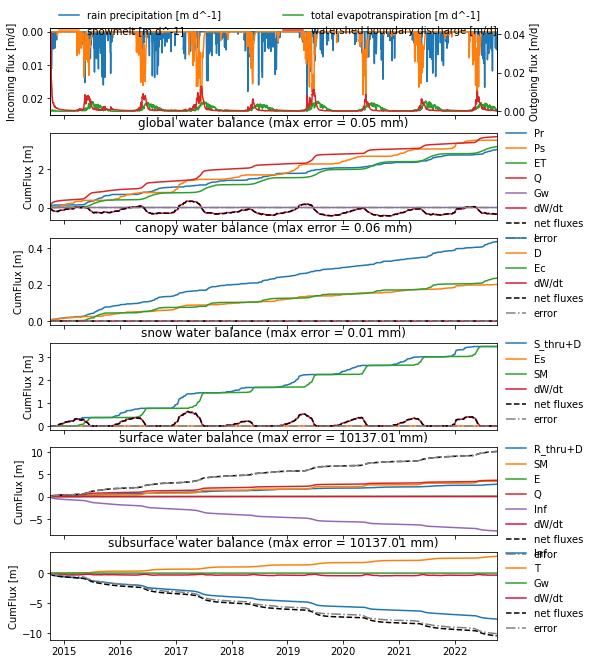

In [3]:
simu_df = ATSutils.load_waterBalance(model_dir='', WB_filename="water_balance-daily.dat",
                                plot = True)

In [4]:
obs_df = utils.load_nwis(sites= "09111250", start = '2015-10-01', end = '2022-10-01')

<AxesSubplot:>

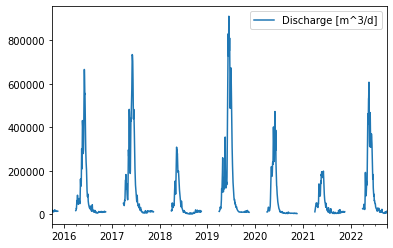

In [5]:
obs_df.plot()

In [6]:
simu_df = simu_df.loc["2015-10-01":"2022-10-01", :].copy()


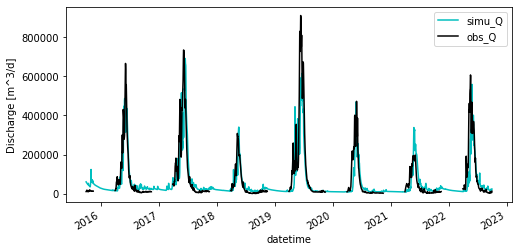

In [7]:
fig,ax = plt.subplots(1,1, figsize=(8,4))
simu_df['watershed boundary discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")

obs_df['Discharge [m^3/d]'].plot(color = 'k', ax=ax, label = "obs_Q")
ax.set_ylabel("Discharge [m^3/d]")
ax.legend()
fig.savefig('simu_obs_hydrographs.png')

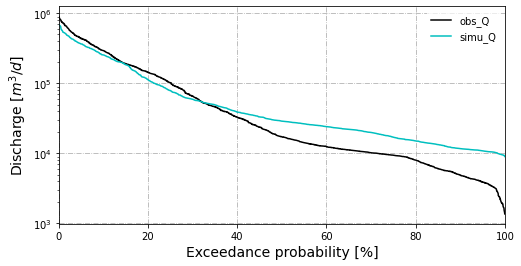

In [8]:
fig, ax = gp.plot_FDC(dfs=[obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]']],
           labels=['obs_Q','simu_Q'], 
           colors=['k', 'c'],
           start_date="2015-10-01" 
           )

fig.savefig('simu_obs_exceedance.png')

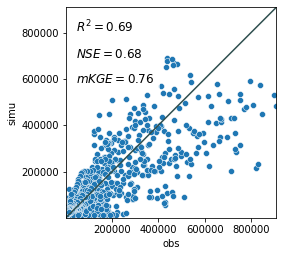

In [9]:
gp.one2one_plot(obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]'],
               metrics=['R^2', 'NSE', 'mKGE'],
                # metrics='all',
               show_density=False,
                start_date="2015-10-01"
               )

plt.tight_layout()
plt.savefig('simu_obs_statistics')

In [10]:
simu_df.to_csv('base_calibrated-wb-2014_2022-GW.csv')